##ESERCIZIO 1: trovare lo zero di una funzione con BISEZIONE METHOD

In [5]:
#Determine the zero of the function g(x) = cos(x) using the bisection method in the interval (0, 4).
#Which checks have been omitted in the implementation of the algorithm described in the lesson text that could speed up the result?

def bisezione (
    g,              # funzione di cui trovare lo zero
    xMin,           # minimo dell'intervallo
    xMax,           # massimo dell'intervallo
    prec = 0.0001): # precisione della funzione (con cui voglio trovare lo zero)
    '''
    Funzione che calcola zeri
    con il metodo della bisezione
    '''
    xAve = 0 #inizializzo la variabile di supporto che mi stamperà il valore cercato
    while ((xMax - xMin) > prec) : #condizione dell'iterazione
        xAve = 0.5 * (xMax + xMin)
        if (g (xAve) * g (xMin) > 0.): xMin = xAve #sfrutta la concordanza o discordanza del segno, se i isegni sono uguali ancora l'intervallino non contiene lo zero
        else                         : xMax = xAve
    return xAve


from math import cos

def func (x) : #FUNZIONE SU CUI VOGLIO TROVARE LO ZERO CON UNA CERTA PRECISIONE(che ho però settato nella scrittura della funzione), SU UN CERTO INTERVALLO
    '''
    Funzione di cui trovare lo zero
    '''
    return cos (x)


# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----
import time

def main () :
    '''
    Funzione che implementa il programma principale
    '''
    # %timeit
    print ('Zero della funzione = ', bisezione (func, 0., 4.))

    #tempo di esecuzione algortimo iterativo:
    start=time.time()
    a = bisezione (func, 0., 4.) #non metto il print qui, ma prima. altrimenti mi calcola anche il tempo della funzione print
    end=time.time()
    print(f" time bisezione = {1000.*(end-start):.3f}ms")

if __name__ == "__main__":
    main ()



Zero della funzione =  1.57073974609375
 time bisezione = 0.008ms


#ESERCIZIO 2: è l'esercizio 1 scritto in froma RICORSIVA

In [47]:

#Perform the previous exercise using a recursive function.
#Which of the two implementations is faster?


def bisezione_ricorsiva (       #MODO RICORSIVO DELLA STESSA FUNZIONE DEFINITA SOPRA
    g,              # funzione di cui trovare lo zero
    xMin,           # minimo dell'intervallo
    xMax,           # massimo dell'intervallo
    prec = 0.0001): # precisione della funzione

    '''
    Funzione che calcola zeri
    con il metodo della bisezione ricorsivo
    '''
    xAve = 0.5 * (xMax + xMin)
    if ((xMax - xMin) < prec): return xAve
    if (g (xAve) * g (xMin) > 0.): return bisezione_ricorsiva (g, xAve, xMax, prec) ; #GUARDA COME VENGONO ORA AGGIORNATI I PARAMETRI NEL RICHIAMARE LA FUNZIONE
    else                         : return bisezione_ricorsiva (g, xMin, xAve, prec) ;



def main () :
    '''
    Funzione che implementa il programma principale
    '''
    print ('Zero della funzione = ', bisezione_ricorsiva(func, 0., 4.))

    #tempo di esecuzione algortimo ricorsivo:
    start=time.time()
    bisezione_ricorsiva(func, 0., 4.) #se mettessi un print attorno a bisezione_... il tempo di esecuzione sarebbe piu lungo, per cui lo escludo e calcolo soltanto il valore
    end=time.time()
    execution_time=end-start
    print(f"time bisezione = {1000.*(end-start):.3f}ms")
    print(f"Il tempo di esecuzione della funzione tra i blocchi start ed end vale: {1000.*(execution_time):.3f}ms") #ok, f sta per troncaree alla terza cifra decimale del float
    print("il tempo di... vale: ", execution_time, "secondi") #in maniera piu rozza, dicono tutte e tre la stessa cosa

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----


if __name__ == "__main__":
    main ()



Zero della funzione =  1.570770263671875
time bisezione = 0.016ms
Il tempo di esecuzione della funzione tra i blocchi start ed end vale: 0.016ms
il tempo di... vale:  1.621246337890625e-05 secondi


#ESERCIZIO 3: fattoriale in forma ricorsiva

In [45]:
#Implement a function that calculates the factorial of a number using a recursive function.

def factorial(n):

   if n<2 :
     return 1
   return n*factorial(n-1) #è qui la ricorsione


def main():
  fact=factorial(10)
  print(fact)

  fact=factorial(3)
  print(fact)


if __name__ == "__main__":
    main ()

3628800
6


#variante esercizio3:
## scrivere la funzione factorial in forma iterativa. confrontare poi i tempi di entrambe le implementazioni.

In [5]:
def factorial_it(n):
  i=1
  m=1 #variabile bandierina
  while(i<=n):
   if n==0: return 1
   else:
    m=m*i
   i=i+1
  return m

def main():
  print(factorial_it(10))


if __name__ == "__main__":
    main ()


3628800


In [19]:
#confronto tempi di esecuzione
import time


def factorial(n):

   if n<2 :
     return 1
   return n*factorial(n-1)
#-------------------------
def factorial_it(n):
 i=1
 m=1 #variabile bandierina
 while(i<=n):
  if n==0: return 1
  else:
   m=m*i
   i=i+1
  return m
#------------------------

def main():

  i=time.time()
  factorial(10)
  f=time.time()
  print("tempo di esecuzione (espresso in ms):",(1000*(f-i)))

  i=time.time()
  factorial_it(10)
  f=time.time()
  print("tempo di esecuzione (espresso in ms):",(1000*(f-i)))


  print("\nLa versione iterativa la più veloce")

if __name__ == "__main__":
    main ()


tempo di esecuzione (espresso in ms): 0.0040531158447265625
tempo di esecuzione (espresso in ms): 0.0019073486328125

La versione iterativa la più veloce


#ESERCIZIO 4:
##**METODO DEL RAPPORTO AUREO** per trovare il *minimo* di una funzione

In [33]:
#Determine the minimum of the function g(x) = x2 + 7.3x + 4 using the golden ratio search method in the interval (-10, 10).

#anche qui si procede per passi, restringendo ad ogni iterazione l’intervallo che contiene l’estremante fino a che diventa più piccolo di una precisione prefissata

def polin(x):
  return x**2+ 7.3*x + 4


def goldenratio(func, xmin, xmax, prec=0.0001):
#Per trovare il minimo di una funzione servono abbastanza punti da capirne la pendenza in diverse regioni dell’intervallo,
#quindi se ne cercano QUATTRO , che determinano TRE intervalli

#L’intervallo si stringe eliminando il tratto dove il minimo di sicuro non c’è. si procede poi sull'intervallo ristretto.

 r=0.618

 x2=xmin+r*(xmax-xmin)
 x3=xmin+(1-r)*(xmax-xmin)
 #Per ottimizzare il calcolo, i punti x2,x3 vengono scelti in modo che UNO DEI DUE POSSA ESSERE UTILIZZATO NELL'INTERAZIONE SEGUENTE,
 #garantendo la stessa proporzione di suddivisione dell’intervallo


 while(xmax-xmin)>prec :
  if(func(x2)<func(x3)): #escludo l'intervallino di destra [x0,x3] TENGO FISSO IL MASSIMO
    xmin=x3
    x2=x2+r*(xmax-x3)
    #x3=xmin+(1-r)*(xmax-xmin)
    #x3=x2
  else : #cioè if(func(x2)>func(x3)) #escludo l'altro intervallo TENGO FISSO IL MINIMO
   xmax=x2
   x3=xmin+(1-r)*(xmax-xmin)
   x2=xmin+r*(x2-xmin)


 return func((xmin+xmax)/2.)




def main():

   a=goldenratio(polin, -10. , 10. )
   print("il minimo della funzione data vale: ", a)

if __name__ == "__main__":
    main ()
#FUNZIONa MA NON È IMPLEMENTATO BENE, DEVE ESSERE PIÙ PULITO SEGUENDO L'ALGORITMO

il minimo della funzione data vale:  -9.322499999919552


In [40]:

#ECCO UNA RISCRITTURA COME SI DEVE

def polin(x):
  return x**2+ 7.3*x + 4

def goldenratio (func,x0, x1, precision=0.0001):
  r = 0.618
  x2 = 0
  x3 = 0

  while (x1-x0 > precision):

   x2 = x0 + r * (x1 - x0)
   x3 = x0 + (1. - r) * (x1 - x0)

   if (func(x3) > func(x2)):   #restringo l'intervallo tennedo fisso uno dei due estremi e spostando l'altro
    x0 = x3
    x1 = x1                    #tengo fisso il massimo e calcolo partendo dal nuovo minimo (ricorda che x3 di partenza è < di x2)

   else:          #restringo l'intervallo tennedo fisso uno dei due estremi e spopstando l'altro
     x1 = x2
     x0 = x0     #qui invece tengo fisso il minimo e calcolo i vari sottointervallindi traslando da dx vs sx finchè la condizione è soddisfatta

  return func((x0+x1)/2.)



#-----------------------------------
def main():

   a=goldenratio(polin, -10. , 10. )
   print("il minimo della funzione data vale: ", a)

if __name__ == "__main__":
    main ()

il minimo della funzione data vale:  -9.322499999989008


#ESERCIZIO5:
##è l'esercizio 4 usando la ricorsione

In [53]:
#Perform the previous exercise using a recursive function.

#Which of the two implementations is faster?

def polin(x):
  return x**2 + 7.3*x + 4

def goldenratio_ric (func,x0, x1, precision=0.0001):

  r = 0.618
  x2 = x0 +  r * (x1 - x0)
  x3 = x0 + (1. - r) * (x1 - x0)
    #ci servono uscita e passo(i) ricorsione:

  if (x1-x0 < precision): return func(x0+x1/2.)
  elif (func(x3)>func(x2)): return goldenratio_ric(func,x3,x1,precision=0.0001)
  else: return goldenratio_ric(func,x0,x2,precision=0.0001)


  return func((x0+x1)/2.)
#-------------------------------------------------------------------------
def main():

   a=goldenratio(polin, -10. , 10. )
   print("il minimo della funzione data vale: ", a)

if __name__ == "__main__":
    main ()

il minimo della funzione data vale:  -9.322499999989008


In [50]:
#ORA CONFRONTIAMO I TEMPI TRA L'IMPLEMENTAZIONE ITERATIVA E QUELLA RICORSIVA DEL METODO DEL RAPPORTO AUREO

import time

def polin(x):
  return x**2+ 7.3*x + 4
#-----------------------------------------------
def goldenratio (func,x0, x1, precision=0.0001):
  r = 0.618
  x2 = 0
  x3 = 0

  while (x1-x0 > precision):

   x2 = x0 + r * (x1 - x0)
   x3 = x0 + (1. - r) * (x1 - x0)

   if (func(x3) > func(x2)):
    x0 = x3
    x1 = x1

   else:
     x1 = x2
     x0 = x0

  return func((x0+x1)/2.)

#-------------------------------------------
def goldenratio_ric (func,x0, x1, precision=0.0001):

  r = 0.618
  x2 = x0 +  r * (x1 - x0)
  x3 = x0 + (1. - r) * (x1 - x0)
    #ci servono uscita e passo(i) ricorsione:

  if (x1-x0 < precision): return func(x0+x1/2.)
  elif (func(x3)>func(x2)): return goldenratio_ric(func,x3,x1,precision=0.0001)
  else: return goldenratio_ric(func,x0,x2,precision=0.0001)


  return func((x0+x1)/2.)
#-------------------------------------------------------------------------
#-------------------------------------------------------------------------
def main():

  i=time.time()
  goldenratio(polin,-10.,10.)
  f=time.time()
  print("tempo di esecuzione con iterazione (espresso in ms):",(1000*(f-i)))

  i=time.time()
  goldenratio_ric(polin,-10.,10.)
  f=time.time()
  print("tempo di esecuzione con ricorsione (espresso in ms):",(1000*(f-i)))


if __name__ == "__main__":
    main ()

#Which of the two implementations is faster? ---> quella con l'iterazione

tempo di esecuzione con iterazione (espresso in ms): 0.03218650817871094
tempo di esecuzione con ricorsione (espresso in ms): 0.058650970458984375


#ESERCIZIO6:
##trovare il **massimo** di una funzione a nostra scelta sempre con il *golden ratio method*


In [56]:
def parab(x):
  return -2*x**2+2  #il massimo vale 2
#-----------------------------------------------
def goldenratio (func,x0, x1, precision=0.0001):
  r = 0.618
  x2 = 0
  x3 = 0

  while (x1-x0 > precision):

   x2 = x0 + r * (x1 - x0)
   x3 = x0 + (1. - r) * (x1 - x0)

   if (func(x3) < func(x2)):    #modifico la condizione sulla pendenza per la selezione dei punti, cosi trovo il massimo
    x0 = x3
    x1 = x1

   else:
     x1 = x2
     x0 = x0

  return func((x0+x1)/2.)


def main():

   a=goldenratio(parab, -1. , 1. )
   print("il massimo della funzione data vale: ", a)

if __name__ == "__main__":
    main ()

il massimo della funzione data vale:  1.9999999991948632


In [61]:
#trovare il massimo ricorsivamente con golden ratiiiiio
def parab(x):
  return -2*x**2 + 2

def goldenratio_ric (func,x0, x1, precision=0.0001):

  r = 0.618
  x2 = x0 +  r * (x1 - x0)
  x3 = x0 + (1. - r) * (x1 - x0)
    #ci servono uscita e passo(i) ricorsione:

  if (x1-x0 < precision): return func(x0+x1/2.)
  elif (func(x3)<func(x2)): return goldenratio_ric(func,x3,x1,precision=0.0001)
  else: return goldenratio_ric(func,x0,x2,precision=0.0001)


  return func((x0+x1)/2.)
#-------------------------------------------------------------------------
def main():

   a=goldenratio_ric(parab, -1. , 1. )
   print("il massimo della funzione data vale: ", a)

if __name__ == "__main__":
    main ()

#E SE AVESSI UNA FUNZIONE CON UN MASSIMO E UN MINIMO IN UN CERTO INTERVALLO E VOLESSI TROVARE ENTRAMBI COME FAREI A IMPLEMENTARE IL METODO DELLA SEZIONE AUREA??

il massimo della funzione data vale:  1.9999999948993474


#esercizio6 extra:
##implementare un algoritmo che trovi sia il max che il min di una certa funzione a scelta, con il metodo del golden ratio

#ESERCIZIO7: confronti e proiezioni grafiche con matplotlib

9.999961853027344


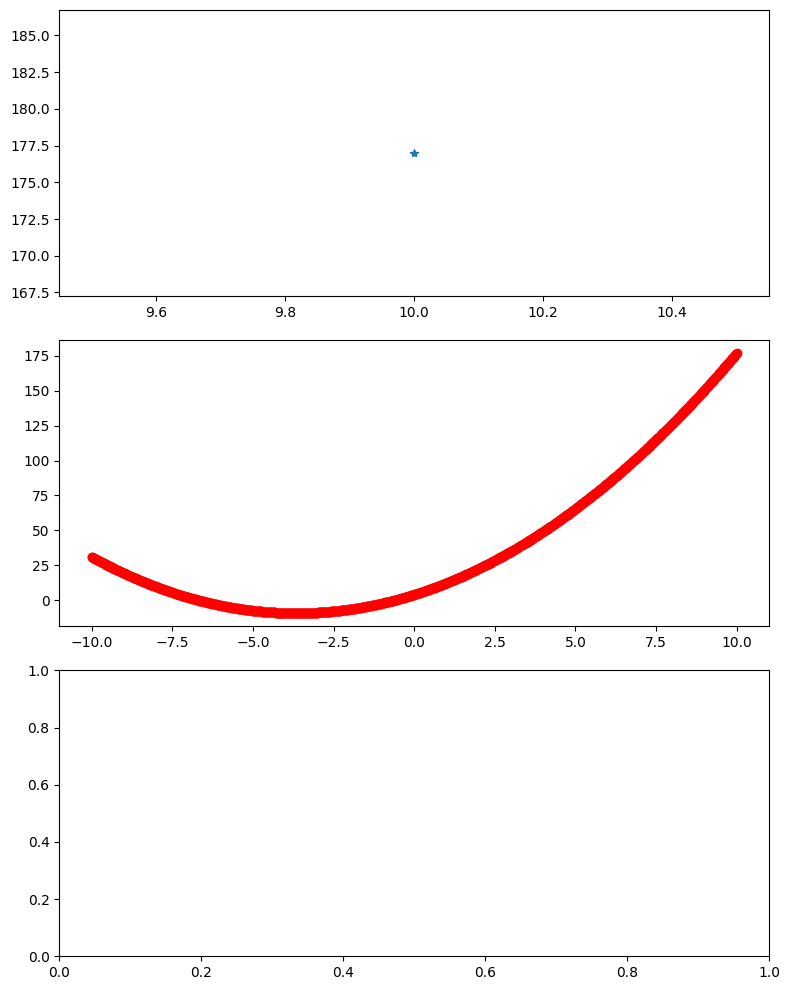

In [98]:
#Modifying the previously developed programs, use matplotlib to plot the studied functions and the points found using the bisection and golden section search methods.

#implementare un programma con le funzione definite sopra (su bisezione e goldenratio) che grafichi la funzione scelta con i suoi punti (zero e max/min)

import numpy as np
import matplotlib.pyplot as plt

def polin(x):
  return x**2+ 7.3*x + 4

def bisezione_ricorsiva (       #
    g,              # funzione di cui trovare lo zero
    xMin,           # minimo dell'intervallo
    xMax,           # massimo dell'intervallo
    prec = 0.0001): # precisione della funzione

    '''
    Funzione che calcola zeri
    con il metodo della bisezione ricorsivo
    '''
    xAve = 0.5 * (xMax + xMin)
    if ((xMax - xMin) < prec): return xAve
    if (g (xAve) * g (xMin) > 0.): return bisezione_ricorsiva (g, xAve, xMax, prec) ; #GUARDA COME VENGONO ORA AGGIORNATI I PARAMETRI NEL RICHIAMARE LA FUNZIONE
    else                         : return bisezione_ricorsiva (g, xMin, xAve, prec) ;



def goldenratio_ric (func,x0, x1, precision=0.0001):

  r = 0.618
  x2 = x0 +  r * (x1 - x0)
  x3 = x0 + (1. - r) * (x1 - x0)
    #ci servono uscita e passo(i) ricorsione:

  if (x1-x0 < precision): return func(x0+x1/2.)
  elif (func(x3)>func(x2)): return goldenratio_ric(func,x3,x1,precision=0.0001)
  else: return goldenratio_ric(func,x0,x2,precision=0.0001)


  return func((x0+x1)/2.)


def main():
   x1=np.linspace(-10.,10.,1000)
   y1=polin(x1)
   point_zero=bisezione_ricorsiva(polin, -10. , 10. ) #lo zero della funzione da graficare calcccolato con golderratio
   print(point_zero)
   #fig, ax = plt.subplots(1,1)
   fig, ax = plt.subplots(3, 1, figsize=(8, 10), tight_layout=True)

# single point
   ax[0].plot(point_zero, polin(point_zero), '*')


# two points
   ax[1].plot(x1,y1, '-ro', label='line & marker')


if __name__ == "__main__":
    main ()
